In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.datasets import make_blobs,make_moons
from scipy.spatial.distance import cdist

In [329]:
X,target = make_blobs()
X = X.reshape(X.shape[0],X.shape[1],1)

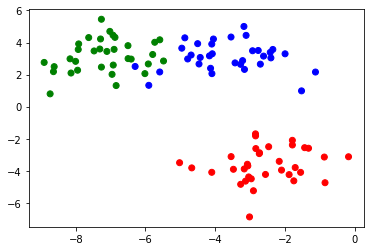

In [330]:
plt.scatter(X[:,0],X[:,1],c = pd.Series(target).map({0:'red',1:'blue',2:'green'}))

In [331]:
X = pd.DataFrame(X.reshape(-1,X.shape[1]))
X.columns = ["ApplicantIncome","LoanAmount"]

### testing with k = 2

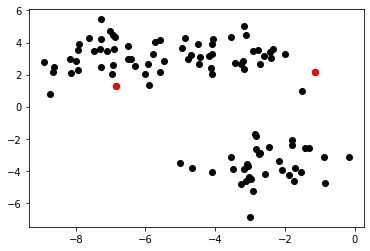

In [332]:
K = 2

#will return a random number of samples
Centroids = (X.sample(n=K))

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c = 'black')

plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c = 'red')

In [333]:
Centroids

,ApplicantIncome,LoanAmount
70,-6.842221,1.320134
0,-1.120887,2.162953


##  K-means algorithm 

In [343]:
def kMeans(X,Centroids):
    j = 0
    diff = 1
    while (diff != 0):
        C = []
        for i1,row1 in X.iterrows():
            min_len = float('inf')
            pos = 0
            i = 1
            for i2,row2 in Centroids.iterrows():
                d1 = (row2["ApplicantIncome"]-row1["ApplicantIncome"])**2
                d2 = (row2["LoanAmount"]-row1["LoanAmount"])**2
                d = np.sqrt(d1+d2)
                if d < min_len:
                    min_len = d
                    pos = i
                i += 1
            C.append(pos)
        X['Cluster'] = C

        Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

        if j == 0:
            j += 1
        else:
            diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    return Centroids

### Elbow curve fitting
#### (Use to find best value for k)

In [344]:
def elbow_dist(X,Centroids):
    dist = []
    for i,row in X.iterrows():
        val = row['Cluster']
        cenT = Centroids.iloc[int(val)-1]
        d1 = (row['LoanAmount'] - cenT['LoanAmount'])**2
        d2 = (row['ApplicantIncome']- cenT['ApplicantIncome'])**2
        d = np.sqrt(d1+d2)
        dist.append(d)
    return dist

In [350]:
elbow_curve_dist = []
for i in range(20):
    Centroids = X.sample(n = i)
    Centroids = kMeans(X,Centroids)
    dist = elbow_dist(X,Centroids)
    elbow_curve_dist.append(sum(dist))

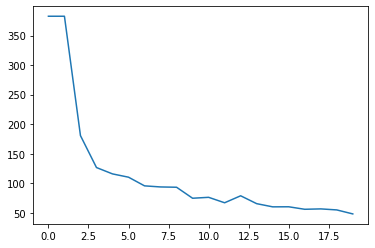

In [351]:
plt.plot(elbow_curve_dist)

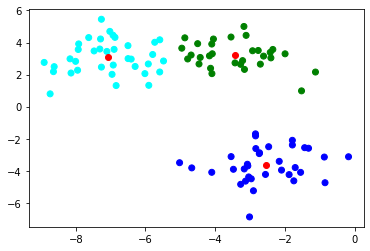

In [341]:
Centroids = X.sample(n = 3)
Centroids = kMeans(X,Centroids)
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c=X['Cluster'].map({1:'blue',2:'green',3:'cyan'}))
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c = "red")

### You can use this also 

#For also calcualting the distances

j = 0
diff = 1
while (diff != 0):
    
    i = 1
    for i1,row1 in Centroids.iterrows():
        lengths = []
        for i2,row2 in X.iterrows():
            d1 = (row1["ApplicantIncome"]-row2["ApplicantIncome"])**2
            d2 = (row1["LoanAmount"]-row2["LoanAmount"])**2
            d = d1+d2
            lengths.append(d)
        X[i] = lengths
        i+=1

    C = []
    for i1,row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X['Cluster'] = C
    #Calculating new Clusters
    
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

    if j == 0:
        j += 1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff)
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]